In [1]:
import os



In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnetpod_v2' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Cocoa','Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Cocoa','Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Cocoa','Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Cocoa','Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Cocoa','Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Cocoa','Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Cocoa','Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Cocoa','Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [15]:
!pip install protobuf==3.19.6

  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires sentencepiece, which is not installed.
tf-models-official 2.12.0 requires seqeval, which is not installed.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
te

In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\Users\owner\Desktop\Machine Learning\TFODCourse\cod\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2025-07-06 23:16:30.119472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2025-07-06 23:16:30.148034: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
Running tests under Python 3.10.11: C:\Users\owner\Desktop\Machine Learning\TFODCourse\cod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_cen

In [9]:
import object_detection


In [10]:
#Create Label Map
labels = [{'name':'Healthy Pod', 'id':1}, {'name':'Infected Pod', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [11]:
 # Create TF records
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [12]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Cocoa\Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Cocoa\Tensorflow\workspace\annotations\test.record


In [13]:
# 4. Copy Model Config to Training Folder
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [14]:
# 5. Update Config For Transfer Learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text) 

In [22]:
#Train the model
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [63]:
print(command)

python Cocoa\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Cocoa\Tensorflow\workspace\models\my_ssd_mobnetpod_v2 --pipeline_config_path=Cocoa\Tensorflow\workspace\models\my_ssd_mobnetpod_v2\pipeline.config --num_train_steps=10000


In [24]:
# EVALUATING MODEL
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])


In [25]:
command


'python Cocoa\\Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Cocoa\\Tensorflow\\workspace\\models\\my_ssd_mobnetpod_v2 --pipeline_config_path=Cocoa\\Tensorflow\\workspace\\models\\my_ssd_mobnetpod_v2\\pipeline.config --checkpoint_dir=Cocoa\\Tensorflow\\workspace\\models\\my_ssd_mobnetpod_v2'

In [66]:
# 8. Load Train Model From Checkpoint

import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [67]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [68]:
# Detect from an Image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [70]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Pod-of-Theobroma-cacao-in-CRDC-Jengka-Pahang-displays-enlargement-of-black-pod-lesion.jpg')

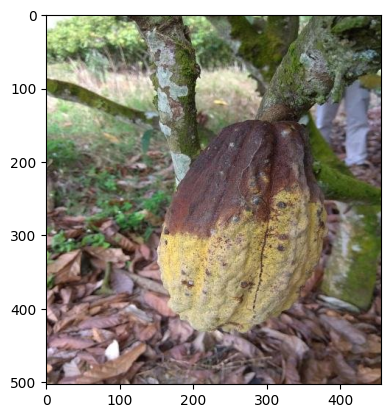

In [71]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
det_num = detections['detection_classes']+label_id_offset
det_score = detections['detection_scores']
det_score1 = det_score[0]*100
det_score2 = det_score[1]*100


In [73]:
det_num

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1], dtype=int64)

In [74]:
def healthy_msg(score1,score2):
    score1= score1.round()
    score2= score2.round()
    if score1 > 50.00:
        print(f'Cocoa is {score1}% HEALTHY')
    else:
        pass
    if score2 > 50.00:
        print(f'Cocoa is {score2}% HEALTHY')
    else:
        pass 
    
def infected_msg(score1,score2):
    score1= score1.round()
    score2= score2.round()
    if score1 > 50.00:
        print(f'Cocoa is {score1}% INFECTED')
    else:
        pass
    if score2 > 50.00:
        print(f'Cocoa is {score2}% INFECTED')
    else:
        pass

In [75]:
if det_num[0] and det_num[1] == 1:
    healthy_msg(det_score1,det_score2)
elif det_num[0] and det_num[1] == 2:
    infected_msg(det_score1,det_score2)
else:
    print('No detection seen Please upload new image')    

Cocoa is 55.0% INFECTED


In [47]:
if det_num[0] and det_num[1] == 1:
    print(f'Cocoa is {det_score1.round()}% and {det_score2.round()}% HEALTHY')
elif det_num[0] and det_num[1] == 2:
    #if det_score1 and det_score2 > 50:
    pr1= f'Cocoa is {det_score1.round()}% and {det_score2.round()}% INFECTED'
    
else:
    print('No detection seen Please upload new image')
    
        
    
    

In [48]:
if det_num[0] and det_num[1] == 1:
    print(f'Cocoa is {det_score1.round()}% and {det_score2.round()}% HEALTHY')
elif det_num[0] and det_num[1] == 2:
    #if det_score1 and det_score2 > 50:
    print(f'Cocoa is {det_score1.round()}% and {det_score2.round()}% INFECTED')
else:
    print('No detection seen Please upload new image')

Cocoa is 92.0% and 43.0% INFECTED


In [49]:
if all([det_num[0],det_num[1]]) == 2 and not any([det_score[0],det_score[1]]) > 0.5:
    print(f'Cocoa is {det_score1.round()}% and {det_score2.round()}% HEALTHY')
#if det_num[0], det_num[1] == 2 and det_score[0], det_score[1] > 0.5 :
    #if det_score[0] and det_score[1] > 0.5:
    
   # print(f'Cocoa is {det_score1.round()}% and {det_score2.round()}% INFECTED')
else:
    print('No detection seen Please upload new image')

No detection seen Please upload new image


In [67]:
category_index

{1: {'id': 1, 'name': 'Healthy Pod'}, 2: {'id': 2, 'name': 'Infected Pod'}}

In [100]:
detections['detection_scores']


array([0.9440674 , 0.88286066, 0.3646678 , 0.22773838, 0.16782902,
       0.08238325, 0.06982406, 0.06603934, 0.06543601, 0.05441757,
       0.04761408, 0.04600341, 0.04456806, 0.04352794, 0.03994301,
       0.03893975, 0.03768212, 0.03625381, 0.03608043, 0.03534935,
       0.03509036, 0.034575  , 0.03434368, 0.03411214, 0.03401813,
       0.03354465, 0.03341313, 0.03327229, 0.03317273, 0.03230186,
       0.0318727 , 0.03113845, 0.02856988, 0.02823396, 0.02776764,
       0.02726034, 0.0254572 , 0.02509145, 0.02474472, 0.02439343,
       0.0243707 , 0.0243414 , 0.02421822, 0.02412152, 0.02395439,
       0.02354293, 0.02341603, 0.02248385, 0.0224643 , 0.02240757,
       0.02233827, 0.02211892, 0.02183153, 0.02171699, 0.0217    ,
       0.02169563, 0.02150869, 0.02095358, 0.02093572, 0.02082818,
       0.02080593, 0.02075738, 0.02073067, 0.02052186, 0.01911482,
       0.01900111, 0.01896781, 0.01887192, 0.0187215 , 0.0185753 ,
       0.01839596, 0.01839412, 0.0182178 , 0.01817315, 0.01806

In [66]:
num_detections

100

In [84]:
# 10. Freezing the Graph
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [85]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [86]:
print(command)

python Cocoa\Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Cocoa\Tensorflow\workspace\models\my_ssd_mobnetpod_v2\pipeline.config --trained_checkpoint_dir=Cocoa\Tensorflow\workspace\models\my_ssd_mobnetpod_v2 --output_directory=Cocoa\Tensorflow\workspace\models\my_ssd_mobnetpod_v2\export


In [87]:
!{command}

C:\Users\owner\Desktop\Machine Learning\TFODCourse\cod\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-10-04 01:18:01.509716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-10-04 01:18:01.509769: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)

In [36]:
# 11. Conversion to TFJS
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 97.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 76.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 107.8 kB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 54.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 kB 53.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 61.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 64.0 kB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 172.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 163.5 kB/s eta 0:00:00a 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 109.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 MB 529.2 kB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 94.1 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1


In [100]:
pip install "jax[cpu]===0.4.7" -f https://whls.blob.core.windows.net/unstable/index.html --use-deprecated legacy-resolver

Looking in links: https://whls.blob.core.windows.net/unstable/index.htmlNote: you may need to restart the kernel to use updated packages.

                                              0.0/990.1 kB ? eta -:--:--
                                              0.0/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.2/990.1 kB ? eta -:--:--
                                              10.

ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires sentencepiece, which is not installed.
tf-models-official 2.12.0 requires seqeval, which is not installed.
tensorflow-intel 2.12.0 requires jax>=0.3.15, but you'll have jax 0.3.14 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you'll have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you'll have protobuf 3.19.6 which is incompatible.
tensor

     ----                                    5.6/44.3 MB 243.6 kB/s eta 0:02:39
     ----                                    5.7/44.3 MB 243.0 kB/s eta 0:02:40
     ----                                    5.7/44.3 MB 242.9 kB/s eta 0:02:40
     ----                                    5.7/44.3 MB 242.9 kB/s eta 0:02:40
     ----                                    5.7/44.3 MB 243.0 kB/s eta 0:02:40
     -----                                   5.7/44.3 MB 242.8 kB/s eta 0:02:40
     -----                                   5.7/44.3 MB 242.8 kB/s eta 0:02:40
     -----                                   5.7/44.3 MB 243.0 kB/s eta 0:02:39
     -----                                   5.7/44.3 MB 243.0 kB/s eta 0:02:39
     -----                                   5.7/44.3 MB 243.1 kB/s eta 0:02:39
     -----                                   5.7/44.3 MB 243.1 kB/s eta 0:02:39
     -----                                   5.7/44.3 MB 242.7 kB/s eta 0:02:39
     -----                              

In [27]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [28]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/export/saved_model Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/tfjsexport


In [29]:
!{command}

2023-06-04 14:51:13.130711: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [41]:
pip install --upgrade "jax[cpu]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 395.0 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.11-py3-none-any.whl size=1487877 sha256=a2c8010e7df24d9a293a896773b877506055510234918d163dc798bd8a449375
  Stored in directory: /home/barak/.cache/pip/wheels/24/d2/da/9e8cec7afad3784f022c4dd1184ba33f9220a9d24b712e50eb
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.10
    Uninstalling jax-0.4.10:
      Successfully uninstalled jax-0.4.10
Note: you may need to restart the kernel to use updated packages.


In [30]:
#Conversion to TFLite
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [31]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [32]:
print(command)

python Cocoa/Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/pipeline.config --trained_checkpoint_dir=Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod --output_directory=Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/tfliteexport


In [33]:
!{command}

2023-06-04 15:01:05.415928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/mnt/c/Users/owner/Desktop/Machine Learning/TFODCourse/cod/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
I0604 15:01:16.717854 139914803286016 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0604 15:01:22.430664 139914803286016 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0604 15:01:25.396782 139914803286016 api.py:459] feature_map_spa

W0604 15:01:48.810228 139914803286016 save.py:274] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/tfliteexport/saved_model/assets
I0604 15:01:57.618253 139914803286016 builder_impl.py:797] Assets written to: Cocoa/Tensorflow/workspace/models/my_ssd_mobnetpod/tfliteexport/saved_model/assets


In [37]:
#Archivibg images.
TRAIN_PATH = os.path.join('Cocoa','Tensorflow','workspace','images','train')
TEST_PATH = os.path.join('Cocoa','Tensorflow','workspace','images','test')
ARCHIVE_PATH = os.path.join('Cocoa','Tensorflow','workspace','images','archive.tar.gz')

In [38]:
!tar -cvzf {ARCHIVE_PATH} {TRAIN_PATH} {TEST_PATH} 

Cocoa/Tensorflow/workspace/images/train/
Cocoa/Tensorflow/workspace/images/train/1-cocoa-pod-ted-kinsman.jpg
Cocoa/Tensorflow/workspace/images/train/1-cocoa-pod-ted-kinsman.xml
Cocoa/Tensorflow/workspace/images/train/1-s2.0-S0885576518303278-gr8.jpg
Cocoa/Tensorflow/workspace/images/train/1-s2.0-S0885576518303278-gr8.xml
Cocoa/Tensorflow/workspace/images/train/2-Figure1-1.png
Cocoa/Tensorflow/workspace/images/train/2-Figure1-1.xml
Cocoa/Tensorflow/workspace/images/train/2004_04_news_fig2_sm.jpg
Cocoa/Tensorflow/workspace/images/train/2004_04_news_fig2_sm.xml
Cocoa/Tensorflow/workspace/images/train/29398718150_0555d48b87_b.jpg
Cocoa/Tensorflow/workspace/images/train/29398718150_0555d48b87_b.xml
Cocoa/Tensorflow/workspace/images/train/3CF129AA-13EB-4DFC-B7CD-E1A26BA8AAD3.JPG.jpg
Cocoa/Tensorflow/workspace/images/train/3CF129AA-13EB-4DFC-B7CD-E1A26BA8AAD3.JPG.xml
Cocoa/Tensorflow/workspace/images/train/55.2.6.JPG.jpg
Cocoa/Tensorflow/workspace/images/train/55.2.6.JPG.xml
Cocoa/Tensorflow/